# Inital EDA (Quality Prediction in a Mining Process)

This notebook covers the initial EDA for the Quality Prediction in a Mining Process dataset that can be found at:
    https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process

In [1]:
import os
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. Loading Dataset, Datetime Conversion and Indexing

In [2]:
# Unzip dataset only if needed
if not os.path.exists("../datasets/quality_prediction_in_a_mining_process.csv"):
    with zipfile.ZipFile("../datasets/quality_prediction_in_a_mining_process.zip", 'r') as zip_ref:
        zip_ref.extractall("../datasets")

# Load dataset
df_mining = pd.read_csv("../datasets/quality_prediction_in_a_mining_process.csv", decimal=',')

# Datetime Conversion and Indexing
df_mining['date'] = pd.to_datetime(df_mining['date'])
df_mining = df_mining.set_index('date')

# Display Dataset Head
print('df_mining ', df_mining.shape, ':', sep='')
with pd.option_context('display.max_columns', None):
    display(df_mining.head())

df_mining (737453, 23):


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


## 2. Dataset Summary and Descriptive Statistics

In [3]:
print("========= Dataset Summary =========")
print(df_mining.info())

========= Dataset Summary =========
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737453 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  7374

In [4]:
print("====== Descriptive Statistics ======")
with pd.option_context('display.max_columns', None):
    display(df_mining.describe())

====== Descriptive Statistics ======


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,299.447794,299.917814,292.071485,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,2.572538,3.636579,30.217804,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,298.262566,298.068000,262.541000,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,299.805000,299.887120,299.477000,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,300.638000,301.791137,303.061000,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


## 3. Handle Missing Values and Indices

In [5]:
print("========= Missisng Values =========")
with pd.option_context('display.max_columns', None):
    display(df_mining.isna().sum().to_frame().T)

print("========= Index Counts =========")
idx_counts = df_mining.index.value_counts().sort_index()
display(idx_counts.to_frame().T)

print("========= Missing Indices (≠ 180) =========")
missing = idx_counts[idx_counts != 180]
display(missing.to_frame().T)

for time_stamp, count in missing.items():
    num_pads = 180 - count
    padding = df_mining.loc[time_stamp].tail(1)
    padding = pd.concat([padding] * num_pads)
    df_mining = pd.concat([df_mining, padding]).sort_index()

if len(df_mining.index.value_counts().loc[lambda x: x != 180]) == 0:
    print('\n✅ Missing rows have been handled correctly. New df_mining.shape:', df_mining.shape)
else:
    print('\n⚠️ Error: Dataset still has missing rows. df_mining.shape:', df_mining.shape)

========= Missisng Values =========


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


========= Index Counts =========


date,2017-03-10 01:00:00,2017-03-10 02:00:00,2017-03-10 03:00:00,2017-03-10 04:00:00,2017-03-10 05:00:00,2017-03-10 06:00:00,2017-03-10 07:00:00,2017-03-10 08:00:00,2017-03-10 09:00:00,2017-03-10 10:00:00,...,2017-09-09 14:00:00,2017-09-09 15:00:00,2017-09-09 16:00:00,2017-09-09 17:00:00,2017-09-09 18:00:00,2017-09-09 19:00:00,2017-09-09 20:00:00,2017-09-09 21:00:00,2017-09-09 22:00:00,2017-09-09 23:00:00
count,174,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180


========= Missing Indices (≠ 180) =========


date,2017-03-10 01:00:00,2017-04-10 00:00:00
count,174,179



✅ Missing rows have been handled correctly. New df_mining.shape: (737460, 23)


## 4. Distribution of Target Column (% Silica Concentrate)

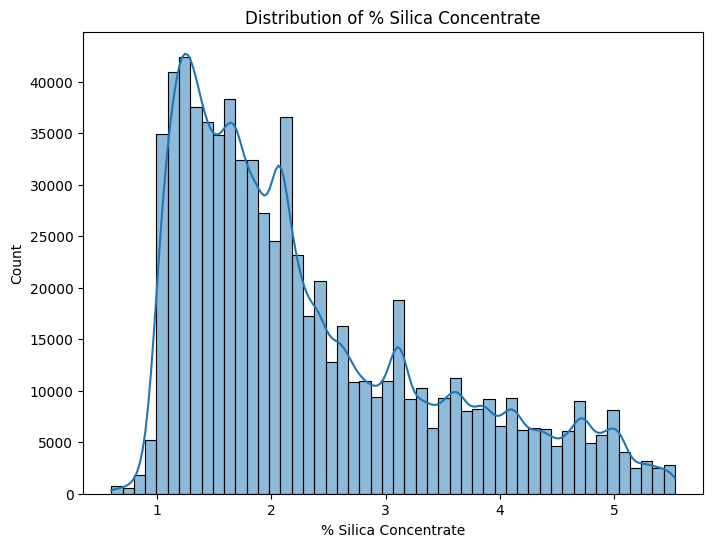

In [6]:
plt.figure(figsize=(8,6))
sns.histplot(df_mining['% Silica Concentrate'], bins=50, kde=True)
plt.title('Distribution of % Silica Concentrate')
plt.xlabel('% Silica Concentrate')
plt.show()

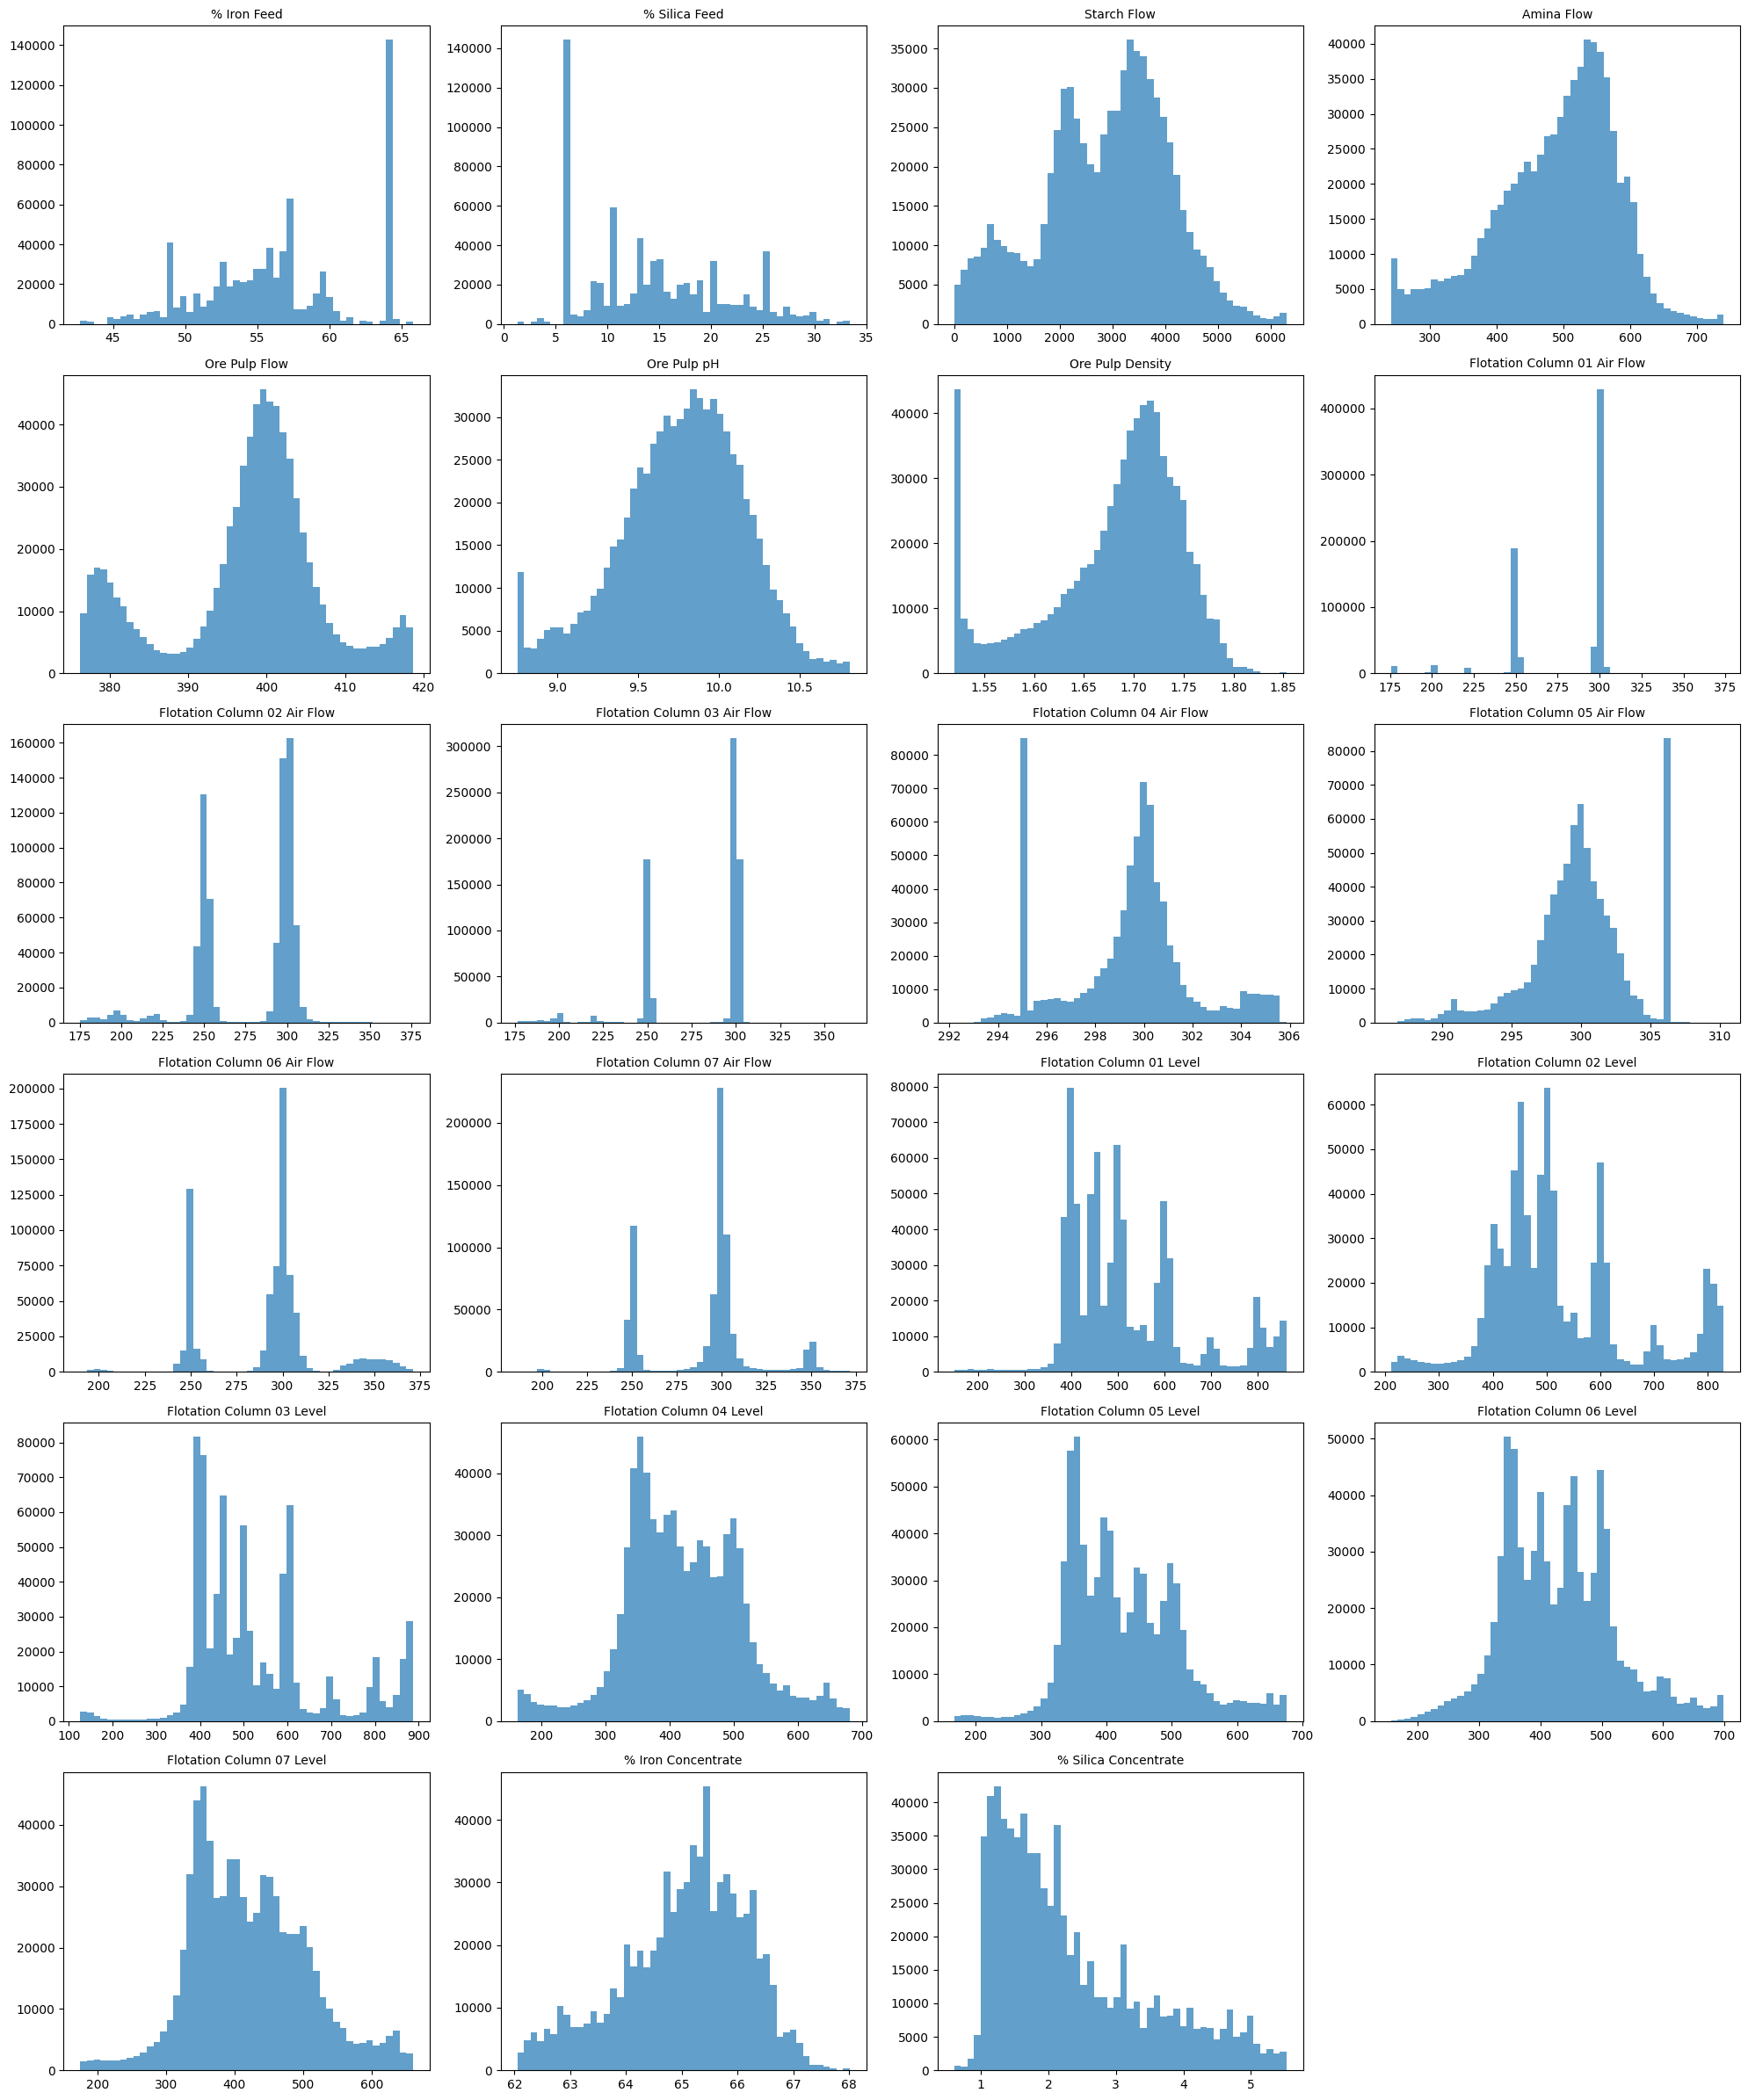

In [12]:
# Select only numeric columns (ignores timestamp + categorical)
num_cols = df_mining.select_dtypes(include=[np.number]).columns

# Layout (adjust as needed)
n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(20, 4 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    # sns.histplot(df_mining[col], bins=50, kde=True)
    plt.hist(df_mining[col], bins=50, alpha=0.7)
    plt.title(col, fontsize=10)
    plt.tight_layout()

plt.show()


## 5. Time Trends for Target Column (% Silica Concentrate)

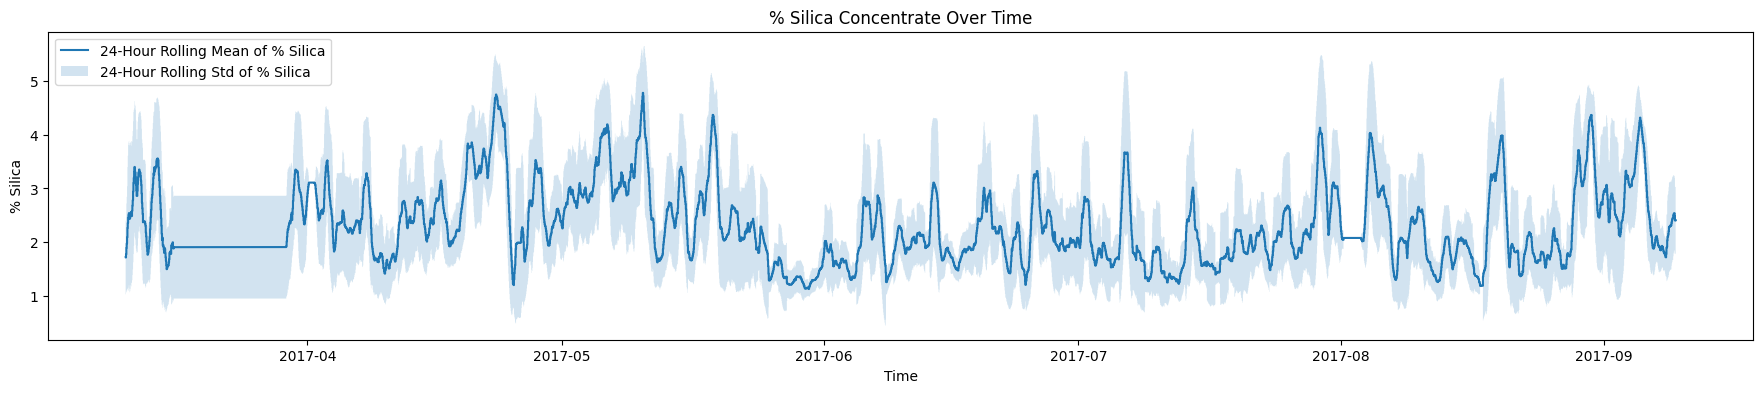

In [8]:
# Apply Rolling Statistics
rolling_window = 3*60*24 # one day rolling window
silica_rolling_mean = df_mining['% Silica Concentrate'].rolling(window=rolling_window, center=True).mean()
silica_rolling_std = df_mining['% Silica Concentrate'].rolling(window=rolling_window, center=True).std()

# Plot time trend
plt.figure(figsize=(22,4))
plt.plot(silica_rolling_mean.index, silica_rolling_mean, label='24-Hour Rolling Mean of % Silica')
plt.fill_between(silica_rolling_std.index, silica_rolling_mean - silica_rolling_std, silica_rolling_mean + silica_rolling_std, alpha=0.2, label='24-Hour Rolling Std of % Silica')
plt.title('% Silica Concentrate Over Time')
plt.xlabel('Time')
plt.ylabel('% Silica')
plt.legend()
plt.show()

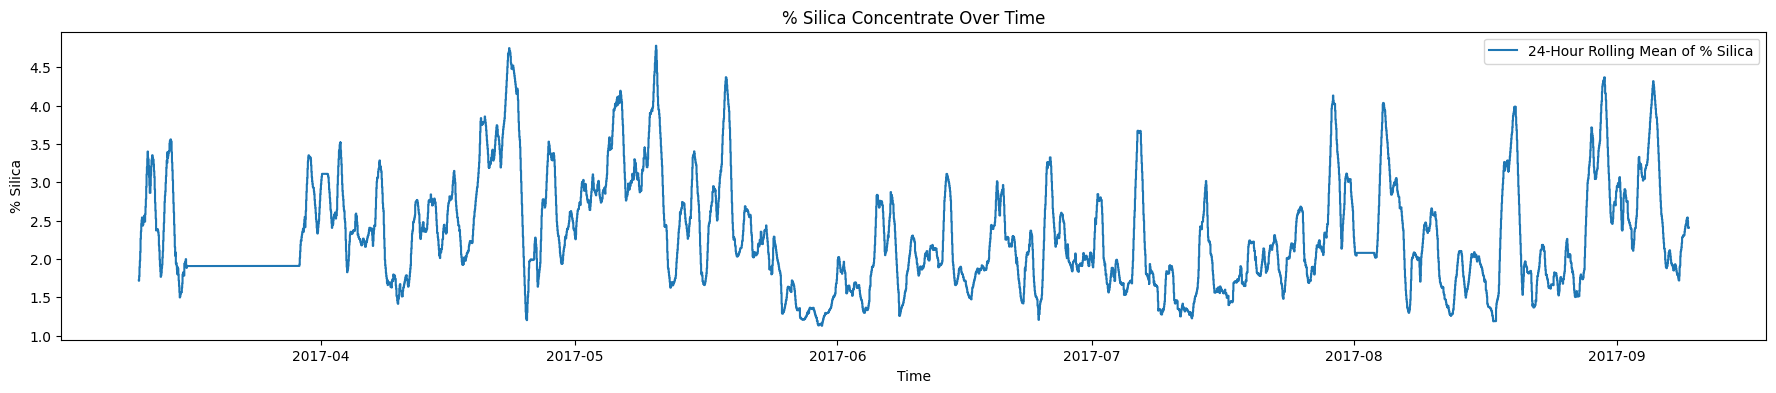

In [13]:
# Apply Rolling Statistics
rolling_window = 3*60*24 # one day rolling window
# Note: Ensure the rolling function is applied to the data, 
# and the index is reflective of the data's true timestamps.
silica_rolling_mean = df_mining['% Silica Concentrate'].rolling(window=rolling_window, center=True).mean()
silica_rolling_std = df_mining['% Silica Concentrate'].rolling(window=rolling_window, center=True).std()

# --- MINIMAL CHANGES TO SOLVE THE GAP ISSUE ---

# 1. Drop NaN values from the rolling stats (this breaks the line across gaps)
silica_rolling_mean = silica_rolling_mean.dropna()
silica_rolling_std = silica_rolling_std.dropna()

plt.figure(figsize=(22,4))

# 2. Plot the cleaned data
# Plot Rolling Mean
plt.plot(silica_rolling_mean.index, silica_rolling_mean, label='24-Hour Rolling Mean of % Silica')

# # Plot Fill Between (Needs to align with the dropped NaNs)
# plt.fill_between(
#     silica_rolling_std.index,
#     silica_rolling_mean - silica_rolling_std,
#     silica_rolling_mean + silica_rolling_std, 
#     alpha=0.2, 
#     label='24-Hour Rolling Std of % Silica'
# )

plt.title('% Silica Concentrate Over Time')
plt.xlabel('Time')
plt.ylabel('% Silica')
plt.legend()
plt.show()

## 6. Correlation Heatmap

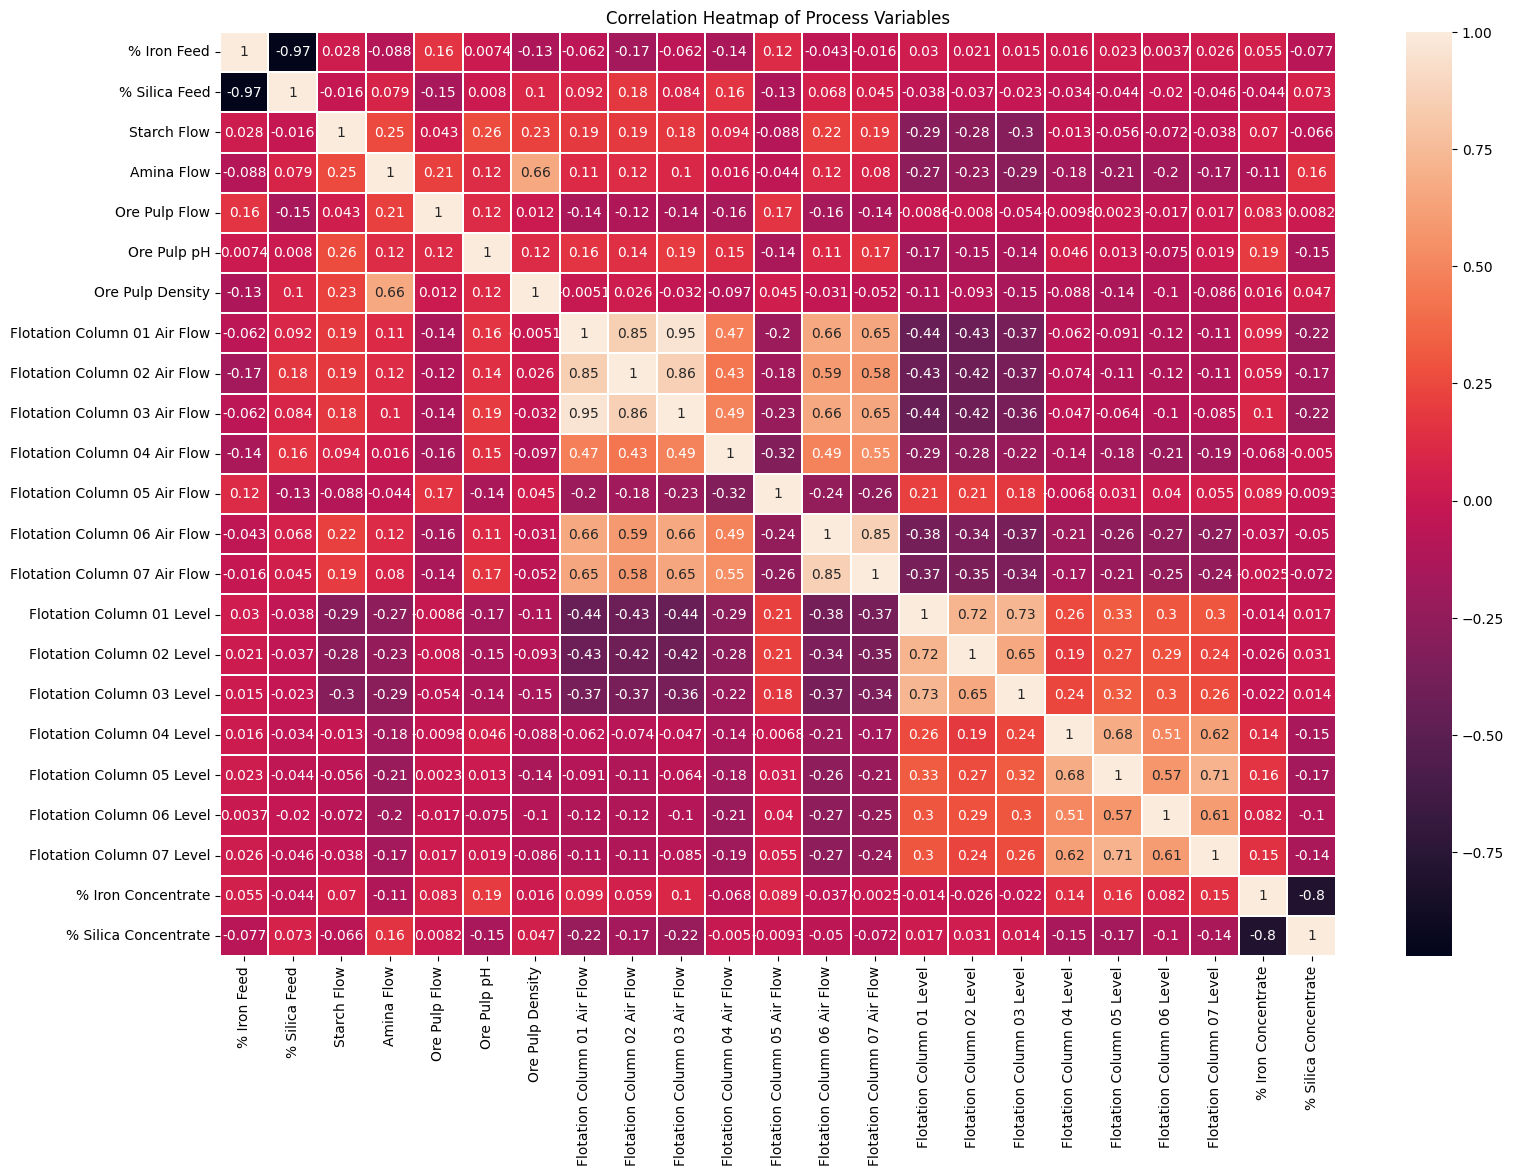

In [10]:
plt.figure(figsize=(18,12))
sns.heatmap(df_mining.corr(), annot=True, linewidths=0.003)
plt.title('Correlation Heatmap of Process Variables')
plt.show()

## 7. Top Correlated Variables with Target Column (% Silica Concentrate)

Top correlated variables with % Silica Concentrate:
% Iron Concentrate              0.800561
Flotation Column 01 Air Flow    0.219148
Flotation Column 03 Air Flow    0.218879
Name: % Silica Concentrate, dtype: float64


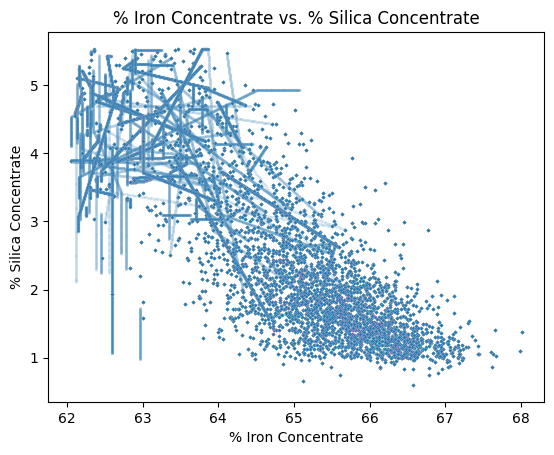

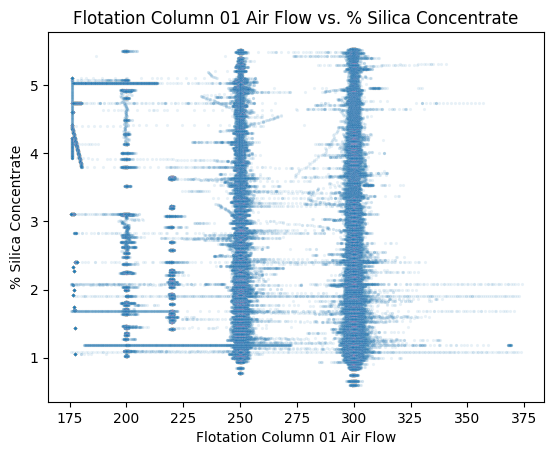

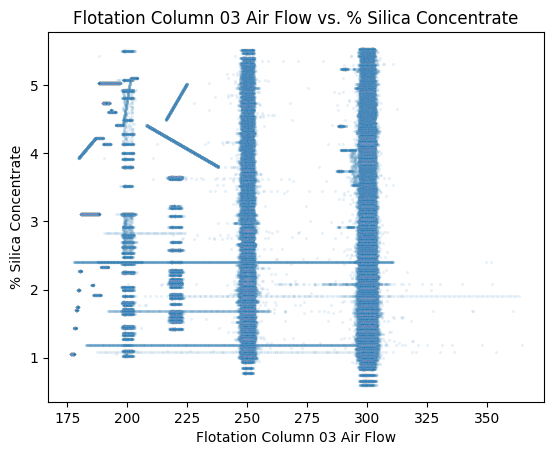

In [11]:
# Find Top Correlations
top_corrs = df_mining.corr()['% Silica Concentrate'].abs().sort_values(ascending=False)[1:4]
print("Top correlated variables with % Silica Concentrate:")
print(top_corrs)

# Visualize Top Correlations
for col in top_corrs.index:
    sns.scatterplot(data=df_mining, x=col, y='% Silica Concentrate', alpha=0.1, s=5)
    plt.title(f'{col} vs. % Silica Concentrate')
    plt.show()

## 8. Preliminary EDA Insights

- Dataset contains 737453 samples and 23 features covering a time range from 2017-03-10 01:00:00 to 2017-09-09 23:00:00.
- After handling missing rows, each hourly block now contains 180 uniform samples (20-second frequency).
- Sensor data collection was mostly consistent but samples are missing for half of 2017-03.
- % Silica Concentrate (target) roughly ranges from 1% to 5%, with skew toward lower values.
- Strong correlations (inverse proportionality) found between target and % Iron Concentrate.
- Flotation Column 01 Air Flow and Flotation Column 03 Air Flow show moderate correlation with % Silica Concentrate.